In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')


import plotly.express as px

In [3]:
train=pd.read_csv('/Users/Takalani mashaba/Downloads/corona/train (5).csv')

In [4]:
train.sample(10)

,Territory X Date,target,cases,Territory,Date
19141,Portugal X 3/31/20,160,7443,Portugal,3/31/20
3305,Brazil X 5/6/20,8588,126611,Brazil,5/6/20
337,Algeria X 4/12/20,293,1914,Algeria,4/12/20
6127,Czechia X 5/12/20,283,8221,Czechia,5/12/20
372,Algeria X 5/17/20,548,7019,Algeria,5/17/20
9217,Germany X 1/23/20,0,0,Germany,1/23/20
16577,Namibia X 3/27/20,0,8,Namibia,3/27/20
19522,Republic of Moldova (the) X 3/28/20,2,231,Republic of Moldova (the),3/28/20
1678,Bahrain X 2/5/20,0,0,Bahrain,2/5/20
17505,Niger (the) X 4/28/20,31,709,Niger (the),4/28/20


In [5]:
#taking the TOP 10 countries with highest number of cases 
df = train.fillna('NA').groupby(['Territory','Date'])['cases'].sum() \
                          .groupby(['Territory']).max().sort_values() \
                          .groupby(['Territory']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,cases
Territory,
United States of America (the),1721753
Brazil,438238
Russian Federation (the),379051
United Kingdom of Great Britain and Northern Ireland (the),270217
Spain,237906
Italy,231732
France,183507
Germany,182196
India,165386


In [6]:
#taking the TOP 10 countries with highest number of cases 
df = train.fillna('NA').groupby(['Territory','Date'])['target'].sum() \
                          .groupby(['Territory']).max().sort_values() \
                          .groupby(['Territory']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,target
Territory,
United States of America (the),101616
United Kingdom of Great Britain and Northern Ireland (the),37908
Italy,33142
Spain,28752
France,28625
Brazil,26754
Belgium,9388
Mexico,9044
Germany,8470


In [7]:
fig =px.bar(top10, x=top10.index, y='cases', labels={'x':'Country'},
             color="cases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['target'] but received: cases

In [8]:
train["Date"] = train["Date"].apply(pd.to_datetime, "%m/%d/%Y")

In [9]:
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26


# SOUTH AFRICA

In [10]:
SS =train[train['Territory']=='South Africa']
SS

,Territory X Date,target,cases,Territory,Date
22272,South Africa X 1/22/20,0,0,South Africa,2020-01-22
22273,South Africa X 1/23/20,0,0,South Africa,2020-01-23
22274,South Africa X 1/24/20,0,0,South Africa,2020-01-24
22275,South Africa X 1/25/20,0,0,South Africa,2020-01-25
22276,South Africa X 1/26/20,0,0,South Africa,2020-01-26
...,...,...,...,...,...
22395,South Africa X 5/24/20,429,22583,South Africa,2020-05-24
22396,South Africa X 5/25/20,481,23615,South Africa,2020-05-25
22397,South Africa X 5/26/20,524,24264,South Africa,2020-05-26
22398,South Africa X 5/27/20,552,25937,South Africa,2020-05-27


In [11]:
SS.head() 

,Territory X Date,target,cases,Territory,Date
22272,South Africa X 1/22/20,0,0,South Africa,2020-01-22
22273,South Africa X 1/23/20,0,0,South Africa,2020-01-23
22274,South Africa X 1/24/20,0,0,South Africa,2020-01-24
22275,South Africa X 1/25/20,0,0,South Africa,2020-01-25
22276,South Africa X 1/26/20,0,0,South Africa,2020-01-26


In [12]:
SS.describe()

,target,cases
count,128.000000,128.000000
mean,72.007812,3927.351562
std,129.735861,6488.416226
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,818.000000
75%,87.750000,4607.750000
max,577.000000,27403.000000


In [13]:
 
#IMPORTING LIBRARIES
import pandas as pd
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')


import plotly.express as px

In [14]:
def cases(Cases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=train.loc[(train['Territory']==a)]
        plt.plot(country['Date'],country['cases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='number of cases' )  

In [15]:
def target(target,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=train.loc[(train['Territory']==a)]
        plt.plot(country['Date'],country['target'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='number of fatalities' )

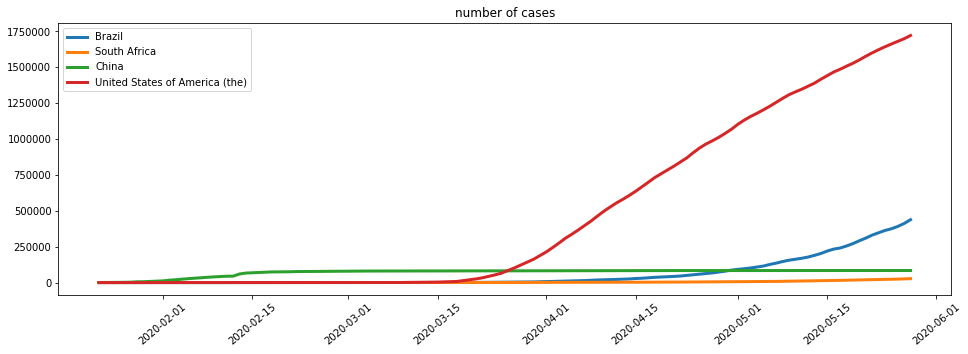

In [16]:
cases('cases','Brazil','South Africa','China','United States of America (the)') #cases

In [17]:
train['dayofweek'] = train['Date'].dt.dayofweek

In [18]:
train

,Territory X Date,target,cases,Territory,Date,dayofweek
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,2
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,3
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,4
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,5
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,6
...,...,...,...,...,...,...
26747,Zimbabwe X 5/24/20,4,56,Zimbabwe,2020-05-24,6
26748,Zimbabwe X 5/25/20,4,56,Zimbabwe,2020-05-25,0
26749,Zimbabwe X 5/26/20,4,56,Zimbabwe,2020-05-26,1
26750,Zimbabwe X 5/27/20,4,132,Zimbabwe,2020-05-27,2
